In [81]:
%matplotlib inline

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as  pd
import numpy as np
import contextily as cx

### Set up paths for all variables

In [82]:
# path to the shapefile
path_stateBoundaries = 'data/stateBoundary/India_State_Boundary.shp'

# path to the csv/excel file

# 1. health budget data (excel) from 2016 to 2023
path_healthBudget = 'data/health.xlsx'

### Load state boundaries of India

In [83]:
# show the attributes of the shapefile
stateBoundaries = gpd.read_file(path_stateBoundaries)
stateBoundaries.head()

,State_Name,geometry
0,Andaman & Nicobar,"MULTIPOLYGON (((10341718.474 1449533.161, 1034..."
1,Chandigarh,"POLYGON ((8546255.616 3606050.813, 8546315.400..."
2,Daman and Diu and Dadra and Nagar Haveli,"MULTIPOLYGON (((8122247.822 2312434.407, 81223..."
3,Delhi,"POLYGON ((8583390.570 3359116.190, 8583476.212..."
4,Haryana,"POLYGON ((8524318.539 3516490.865, 8524451.392..."


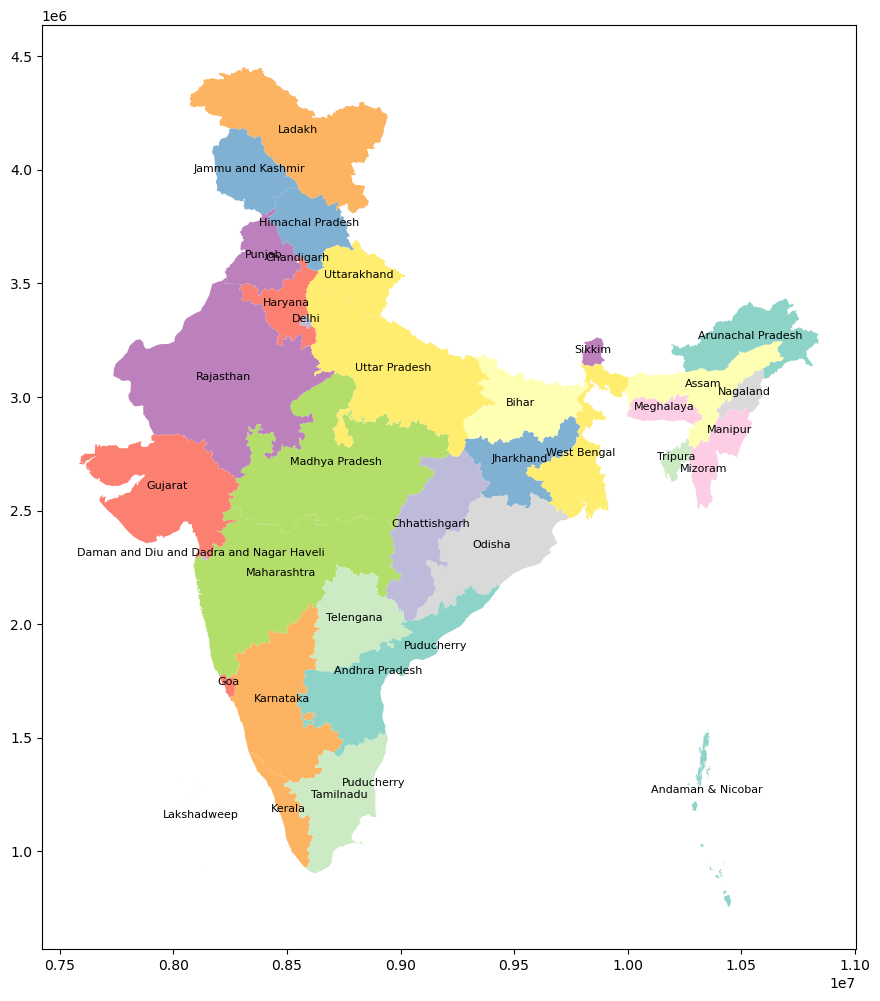

In [84]:
# plot the state boundaries with different colors and labels
# Read the shapefile
state_boundaries = gpd.read_file(path_stateBoundaries)

# Plot the state boundaries
state_boundaries.plot(column='State_Name', cmap='Set3', legend=False, figsize=(18, 12))

# Add labels to the plot
for x, y, label in zip(state_boundaries.geometry.centroid.x, state_boundaries.geometry.centroid.y, state_boundaries['State_Name']):
    plt.text(x, y, label, fontsize=8, ha='center')

# Show the plot
plt.show()



### Load health budget data

In [85]:
healthBudget = pd.read_excel(path_healthBudget)
healthBudget.head()

,State_UT,State_UT_Code,Fiscal Year,Estimate,Per Capita Expenditure on Health Sector,Total Health Sector Expenditure,Total Health Sector Expenditure as % of State Budget,Revenue Expenditure as % of Total Health Sector Expenditure,Capital Expenditure (including Loans & Advances ) as % of Total Health Sector Expenditure
0,Andhra Pradesh,1,2016-17,Actuals,1254.501982,6456.4199,4.894089,93.824528,6.175472
1,Andhra Pradesh,1,2017-18,Budget Estimates,1395.691202,7222.5624,4.847674,93.800091,6.199909
2,Andhra Pradesh,1,2017-18,Revised Estimates,1319.229067,6826.8785,4.512228,95.853201,4.146799
3,Andhra Pradesh,1,2017-18,Actuals,1247.678119,6456.6095,4.696222,96.887531,3.112469
4,Andhra Pradesh,1,2018-19,Budget Estimates,1686.444995,8774.9106,4.869204,94.596629,5.403371


In [86]:
# Rename the State/UT column to State_Name
healthBudget.rename(columns={'State_UT': 'State Name'}, inplace=True)
healthBudget.rename(columns={'Per Capita Expenditure on Health Sector ': 'Per Capita Expenditure on Health Sector'}, inplace=True)

In [87]:
# Check how many fiscal years are there in the dataset
healthBudget['State Name'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [88]:
# Choose Maharashtra, Tamil Nadu, Madhya Pradesh for further analysis
healthBudget_states = healthBudget[healthBudget['State Name'].isin(['Maharashtra', 'Tamil Nadu', 'Madhya Pradesh', 'Uttar Pradesh', 'Kerala', 'Bihar'])]
# Choose Actual Revenue Expenditure on Medical and Public Health
healthBudget_states = healthBudget_states[healthBudget_states['Estimate'].isin(['Actuals'])]
healthBudget_states.head()

# show all attributes of the dataframe
healthBudget_states.columns

Index(['State Name', 'State_UT_Code', 'Fiscal Year', 'Estimate',
       'Per Capita Expenditure on Health Sector',
       'Total Health Sector Expenditure',
       'Total Health Sector Expenditure as % of State Budget',
       'Revenue Expenditure as % of Total Health Sector Expenditure',
       'Capital Expenditure (including Loans & Advances ) as % of Total Health Sector Expenditure'],
      dtype='object')

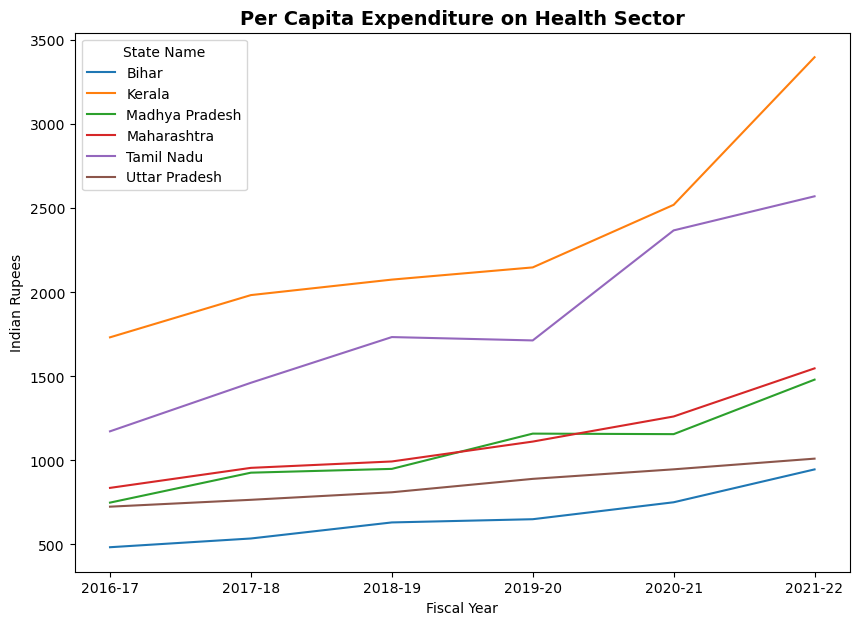

In [89]:
# Plot the change over years for Maharashtra, Tamil Nadu, Madhya Pradesh with line plot
healthBudget_states.pivot(index='Fiscal Year', columns='State Name', values='Per Capita Expenditure on Health Sector').plot(kind='line', figsize=(10, 7))
# Add title and axis names
plt.title('Per Capita Expenditure on Health Sector', fontsize=14, fontweight='bold')
plt.ylabel('Indian Rupees')
plt.show()

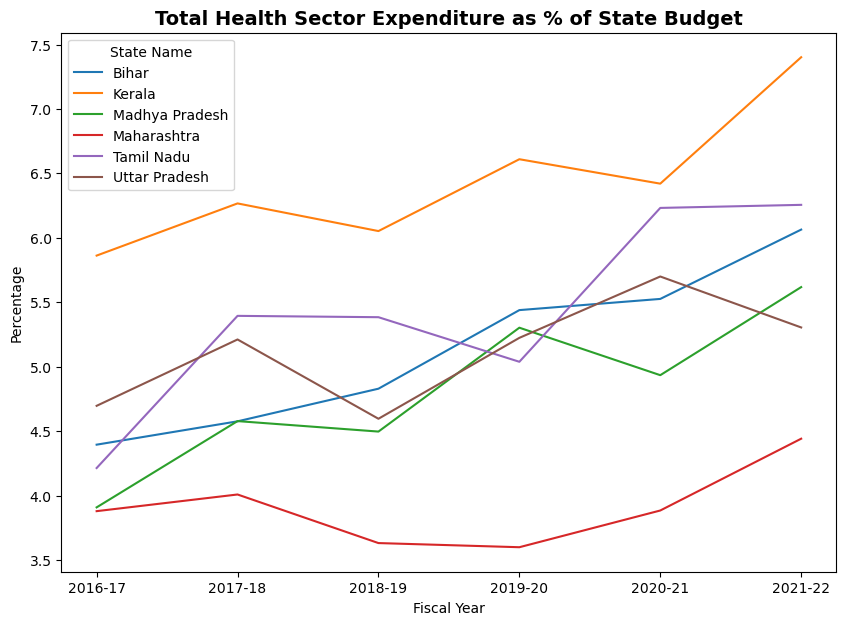

In [90]:
healthBudget_states.pivot(index='Fiscal Year', columns='State Name', values='Total Health Sector Expenditure as % of State Budget').plot(kind='line', figsize=(10, 7))
plt.ylabel('Percentage')
# add title and axis names
plt.title('Total Health Sector Expenditure as % of State Budget', fontsize=14, fontweight='bold')
plt.show()

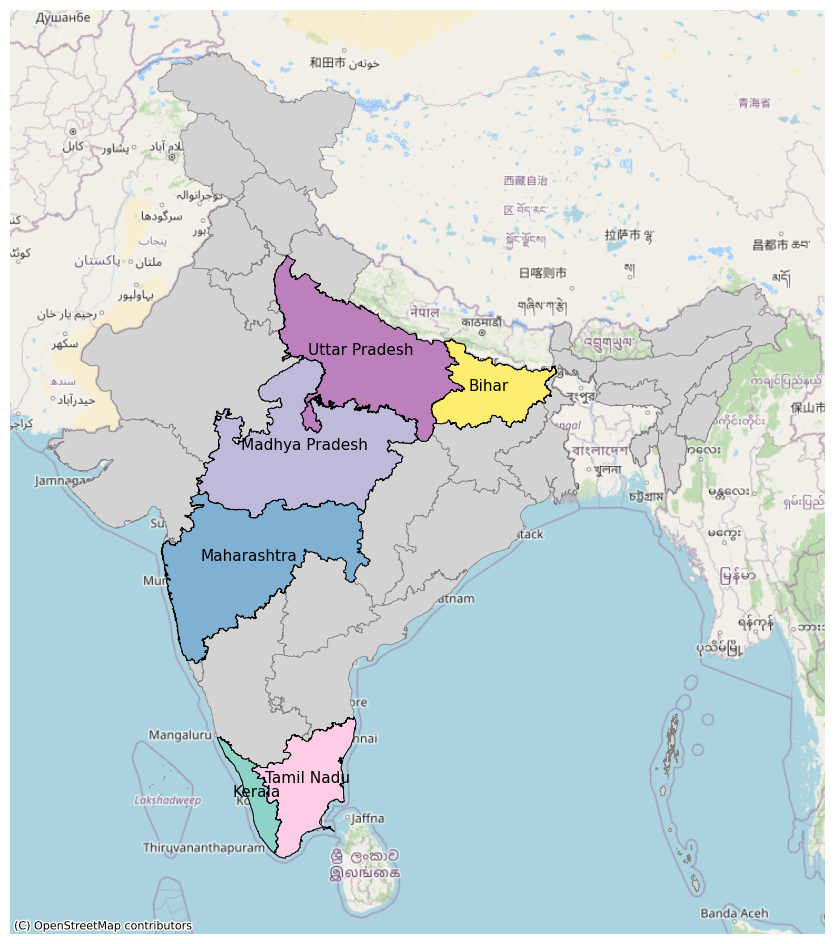

In [95]:
# Read the shapefile
state_boundaries = gpd.read_file(path_stateBoundaries)


# Define the figure and axis
fig, ax= plt.subplots(1, 1, figsize=(18, 12))

# plot without axis
ax.axis('off')

# Plot all the state boundaries with the same grey color
state_boundaries.plot(ax=ax, color='lightgrey', edgecolor='grey', linewidth=0.5)

# Change the name of Tamilnadu to Tamil Nadu
state_boundaries['State_Name'].replace({'Tamilnadu': 'Tamil Nadu'}, inplace=True)

# Highlight the three specific states in blue and with bolder borders
highlight_states = ['Maharashtra', 'Tamil Nadu', 'Madhya Pradesh', 'Uttar Pradesh', 'Kerala', 'Bihar']
state_boundaries[state_boundaries['State_Name'].isin(highlight_states)].plot(ax=ax, cmap='Set3', edgecolor='black', linewidth=0.7)

# Add labels to the plot
for idx, row in state_boundaries.iterrows():
    if row['State_Name'] in highlight_states:
        plt.text(row.geometry.centroid.x, row.geometry.centroid.y, row['State_Name'], fontsize=11, ha='center')

# Add OSM basemap
cx.add_basemap(ax, crs=state_boundaries.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)
# Show the plot
plt.show()


In [ ]:
# Plot a series of maps for a state over the years
# Define the figure and axis
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

# Select the state
state = 'Tamil Nadu'

